In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis
import h5py

In [75]:
p = [1, 5, -2, 3]
# print(analysis.Lambda1(p)[0, 0])
# print(analysis.inner(analysis.Lambda1(p), analysis.Lambda1(p)))
analysis.A_ab(p)

array([[117.        +0.j,  35.15384615+0.j],
       [ 35.15384615+0.j,  35.15384615+0.j]])

In [2]:
wall_src_file = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq19214/Zq.h5'
wk, wp, wZq = analysis.load_Zq(wall_src_file)
wp_squared = np.array([analysis.square(p) for p in wp])
Zq_wall = np.mean(wZq, axis = 1)
σZq_wall = np.std(wZq, axis = 1)

In [3]:
f_d10a = h5py.File('/Users/theoares/lqcd/npr_momfrac/phiala_code/analysis_output/quarkNPR_cl3_16_48_b6p1_m0p2450.h5', 'r')
mom_list_a, Zqa, σa = [], [], []
for x in f_d10a.keys():
    mom_list_a.append(f_d10a[x]['mom'][()].tolist())
    Zqx = f_d10a[x]['Zq'][()]
    Zqa.append(np.mean(Zqx))
    σa.append(np.std(Zqx))
Zqa = np.array(Zqa)
σa = np.array(σa)

In [45]:
Zp0 = f_phiala_out['0000']['Zq'][()]
f = h5py.File(out_file, 'r')
Z0 = f['Zq'][()][0, :]

In [46]:
np.abs(np.mean(Z0) - np.mean(Zp0))

3.7034268524818106e-08

In [57]:
# When run on every configuration in d10a, the output of Phiala's code agrees with the output of my code. When it is 
# run on a few less select configurations, it then agrees with the data stored in d10a, so everything is consistent.

f_phiala_out = h5py.File('/Users/theoares/lqcd/npr_momfrac/phiala_code/analysis_output/phiala_output.h5', 'r')
# f_phiala_out = h5py.File('/Users/theoares/lqcd/npr_momfrac/phiala_code/analysis_output/phiala_output_less_cfgs.h5', 'r')
mom_list_p, Zq_p, σp = [], [], []
for x in f_phiala_out.keys():
    mom_list_p.append(f_phiala_out[x]['mom'][()].tolist())
    Zq_x = f_phiala_out[x]['Zq'][()]
    Zq_p.append(np.mean(Zq_x))
    σp.append(np.std(Zq_x))
Zq_p = np.array(Zq_p)
σp = np.array(σp)

<IPython.core.display.Javascript object>


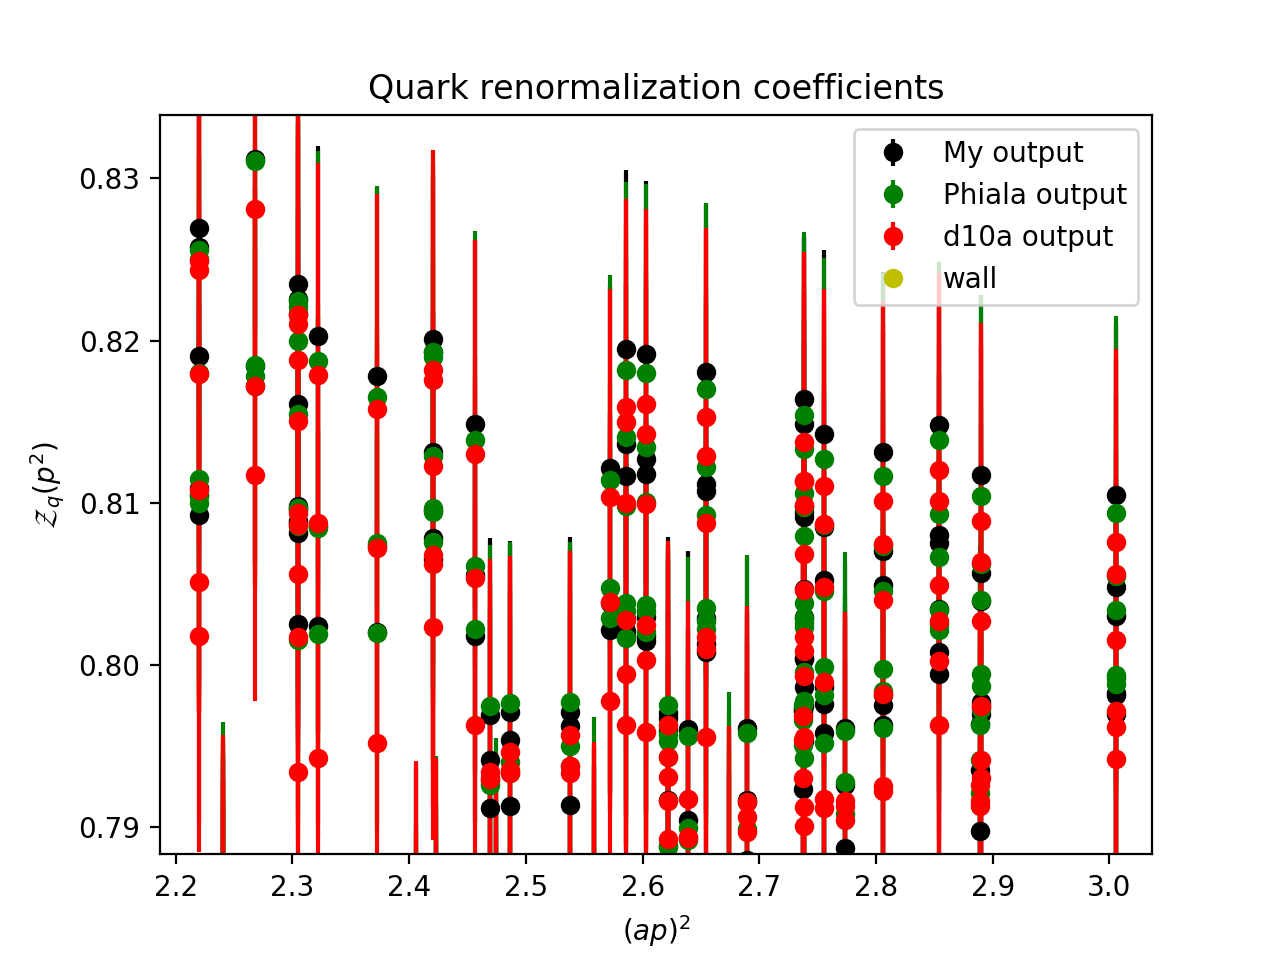

In [59]:
V = (16 ** 3) * 48

plt.figure()
# out_file = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq21664/Zq.h5'
out_file = '/Users/theoares/lqcd/npr_momfrac/phiala_code/analysis_output/my_Zq_analysis.h5'
k_list, mom_list, Zq = analysis.load_Zq(out_file)
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
Zq_μ = np.mean(Zq, axis = 1)
Zq_σ = np.std(Zq, axis = 1)

plt.errorbar(p_squared, np.real(Zq_μ), yerr = np.real(Zq_σ), label = 'My output', fmt = 'o', c = 'k')

plt.errorbar(p_squared, np.real(Zq_p), yerr = np.real(σp), label = 'Phiala output', fmt = 'o', c = 'g')

indices = np.array([mom_list_a.index(k.tolist()) for k in k_list])
plt.errorbar(p_squared, np.real(Zqa[indices]), yerr = np.real(σa[indices]), label = 'd10a output', fmt = 'o', c = 'r')

# k_rep_list, Zq4_orb_μ, Zq4_orb_σ = analysis.average_O3_orbits(Zq, k_list4)
# p_orb_squared = np.array([np.abs(analysis.square(analysis.to_lattice_momentum(k))) for k in k_rep_list])
# plt.errorbar(p_orb_squared, np.real(Zq4_orb_μ), yerr = np.real(Zq4_orb_σ), label = 'averaged over orbits', fmt = 'o', c = 'b')

plt.errorbar(wp_squared, np.real(Zq_wall), label = 'wall', fmt = 'o', c = 'y')
plt.legend()
plt.title('Quark renormalization coefficients')
plt.ylabel('$\mathcal{Z}_q(p^2)$')
plt.xlabel('$(ap)^2$')
plt.show()

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/d10a_measNPR_data.pdf')

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/' + str(jobid) + '/Zq.pdf')